<a href="https://colab.research.google.com/github/Ironsoldier353/svm_cat_dog/blob/main/final_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ironsoldier353","key":"9b37daec76c6fa99cde94028c72f11a1"}'}

In [ ]:
import os
print(os.listdir('/content'))

['.config', 'dogs-vs-cats', 'kaggle (1).json', 'dogs-vs-cats.zip', 'sample_data']


In [ ]:
import os
import shutil

# Define paths
source_file = '/content/kaggle (1).json'
destination_dir = '/root/.kaggle/'
destination_file = os.path.join(destination_dir, 'kaggle.json')

# Create destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Move and rename the file
shutil.move(source_file, destination_file)

# Set correct file permissions
os.chmod(destination_file, 0o600)


In [ ]:
!kaggle competitions download -c dogs-vs-cats


dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q dogs-vs-cats.zip -d /content/dogs-vs-cats


replace /content/dogs-vs-cats/sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os

# List files and directories
os.listdir('/content/dogs-vs-cats')


['train.zip',
 'train',
 'submission.csv',
 'test1.zip',
 'test',
 'sampleSubmission.csv']

Importing the libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import zipfile
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


In [ ]:
# Define paths
main_dir_path = '/content/dogs-vs-cats'
train_zip_path = os.path.join(main_dir_path, 'train.zip')
test1_zip_path = os.path.join(main_dir_path, 'test1.zip')

# Define extraction paths
train_extract_path = os.path.join(main_dir_path, 'train')
test1_extract_path = os.path.join(main_dir_path, 'test', 'test1')

# Create extraction directories if they do not exist
os.makedirs(train_extract_path, exist_ok=True)
os.makedirs(os.path.dirname(test1_extract_path), exist_ok=True)

# Extract train.zip
if os.path.exists(train_zip_path):
    with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
        zip_ref.extractall(train_extract_path)
    print("Unzipped train.zip successfully.")
else:
    print("train.zip is missing or not found.")

# Extract test1.zip
if os.path.exists(test1_zip_path):
    with zipfile.ZipFile(test1_zip_path, 'r') as zip_ref:
        zip_ref.extractall(os.path.dirname(test1_extract_path))
    print("Unzipped test1.zip successfully.")
else:
    print("test1.zip is missing or not found.")


Unzipped train.zip successfully.
Unzipped test1.zip successfully.


In [ ]:
# Verify contents of the training directory
print("Training directory contents:")
print(os.listdir(train_extract_path))

# Verify contents of the test directory
print("Test directory contents:")
print(os.listdir(os.path.dirname(test1_extract_path)))

Training directory contents:
['train']
Test directory contents:
['test1']


In [ ]:
# Define the paths to check
nested_train_dir = os.path.join(train_extract_path, 'train')
nested_test1_dir = os.path.join(main_dir_path, 'test', 'test1')

In [ ]:
# Define the path to the deeper 'train' directory
deeper_train_dir = os.path.join('/content/dogs-vs-cats/train', 'train')

Preprocessing the data

In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define image size and paths
img_size = (64, 64)
train_dir = '/content/dogs-vs-cats/train/train'

# Initialize lists to hold image data and labels
data = []
labels = []

def load_images_from_directory(folder):
    """Load and preprocess images from a directory."""
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img)
        img_array = img_array.flatten()  # Flatten image into a vector
        data.append(img_array)

        # Determine label from filename
        if 'cat' in filename:
            labels.append(0)  # Label 0 for cats
        elif 'dog' in filename:
            labels.append(1)  # Label 1 for dogs

# Load images and labels
load_images_from_directory(train_dir)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)


Train the model

In [ ]:
# Check the shape of the training and validation sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)


Shape of X_train: (20000, 12288)
Shape of y_train: (20000,)
Shape of X_val: (5000, 12288)
Shape of y_val: (5000,)


In [ ]:
# Reduce dimensionality to make SVM training feasible
pca = PCA(n_components=200)  # Adjust the number of components based on memory and performance
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_val)

In [ ]:
# Print the shapes of the reduced datasets
print(f"Shape of X_train_reduced: {X_train_reduced.shape}")
print(f"Shape of X_val_reduced: {X_val_reduced.shape}")

Shape of X_train_reduced: (20000, 300)
Shape of X_val_reduced: (5000, 300)


In [ ]:
# Train SVM model
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svm_model.fit(X_train_reduced, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

Evaluation

In [ ]:
# Evaluate the model
accuracy = svm_model.score(X_val_reduced, y_val)
print(f'Validation Accuracy: {accuracy:.2f}')


Validation Accuracy: 0.62


In [ ]:
# List contents of the directory to verify the structure
print(os.listdir('/content/dogs-vs-cats'))


['train.zip', 'train', 'submission.csv', 'test1.zip', 'test', 'sampleSubmission.csv']


In [ ]:
# Define the paths
test1_zip_path = '/content/dogs-vs-cats/test1.zip'
test_extract_path = '/content/dogs-vs-cats/test'

# Create extraction directory if it doesn't exist
os.makedirs(test_extract_path, exist_ok=True)

# Extract test1.zip
if os.path.exists(test1_zip_path):
    with zipfile.ZipFile(test1_zip_path, 'r') as zip_ref:
        zip_ref.extractall(test_extract_path)
    print("Unzipped test1.zip successfully.")
else:
    print("test1.zip is missing or not found.")


Unzipped test1.zip successfully.


In [ ]:
# List files in the test directory
test_dir = '/content/dogs-vs-cats/test'
print(os.listdir(test_dir))


['test1']


In [ ]:
# Define image size (use the size you used for training)
img_size = (64,64)

# Define the correct path to the test1 directory
test_dir = '/content/dogs-vs-cats/test/test1'

# Initialize list to hold test image data
test_data = []

def load_images_from_directory(folder):
    """Load and preprocess images from a directory."""
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):  # Ensure it's a file
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img)
            img_array = img_array.flatten()  # Flatten image into a vector
            test_data.append(img_array)

# Load test images
load_images_from_directory(test_dir)

# Convert list to numpy array
test_data = np.array(test_data)

# Apply PCA transformation to test data
# Assuming pca was fitted during training
X_test_reduced = pca.transform(test_data)

# Predict on the test set
test_predictions = svm_model.predict(X_test_reduced)

# Load sample submission file
import pandas as pd
submission_df = pd.read_csv('/content/dogs-vs-cats/sampleSubmission.csv')

# Ensure to update the 'id' column with the filenames if needed
submission_df['label'] = test_predictions

# Save the submission file
submission_df.to_csv('/content/dogs-vs-cats/submission.csv', index=False)
print("Submission file created successfully.")


Submission file created successfully.


This can consume high execution time but can make the model way better

Find the best parameters for the model to get better acuracy

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from joblib import parallel_backend

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto'],
}

# Ensure n_iter is appropriate
n_iter_search = min(8, len(param_distributions['svc__C']) * len(param_distributions['svc__gamma']))

# Create a smaller sample of the training data
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_reduced, y_train, train_size=0.5, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(svm_model, param_distributions, n_iter=n_iter_search, cv=3, random_state=42, n_jobs=-1)

# Use threading backend to avoid os.fork() issues
with parallel_backend('threading'):
    random_search.fit(X_train_sample, y_train_sample)

# Best model after random search
best_model = random_search.best_estimator_
print(f"Best Model: {best_model}")


In [ ]:
# Evaluate on the validation set
accuracy = best_model.score(X_val_reduced, y_val)
print(f"Validation Accuracy: {accuracy:.4f}")

In [ ]:
import pandas as pd

# Define the path to the submission CSV file
submission_csv_path = '/content/dogs-vs-cats/submission.csv'

# Verify if the file exists and load it
if os.path.exists(submission_csv_path):
    # Load the submission CSV file
    submission_df = pd.read_csv(submission_csv_path)

    # Display the first few rows of the CSV to verify its contents
    print("Loaded submission CSV:")
    print(submission_df.head())
else:
    print(f"File not found: {submission_csv_path}")


Loaded submission CSV:
   id  label
0   1      0
1   2      0
2   3      1
3   4      0
4   5      0


Visualizing the predicted result with the actual one

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define paths
test_images_dir = '/content/dogs-vs-cats/test/test1'
output_images_dir = '/content/dogs-vs-cats/visual_inspection'

# Ensure the output directory exists
os.makedirs(output_images_dir, exist_ok=True)

# Regenerate and visualize images
def visualize_predictions(submission_df, test_images_dir, output_images_dir, num_images=5):
    # Take a sample of images to visualize
    sample_df = submission_df.head(num_images)

    for idx, row in sample_df.iterrows():
        img_id = f'{int(row["id"])}.jpg'  # Assuming images are in the format id.jpg
        predicted_label = row['label']

        img_path = os.path.join(test_images_dir, img_id)

        if os.path.exists(img_path):
            # Load the image
            img = Image.open(img_path)

            # Create a figure for the image
            plt.figure(figsize=(5, 5))
            plt.imshow(img)
            plt.title(f'ID: {img_id}\nPredicted Label: {predicted_label}')
            plt.axis('off')

            # Save the figure
            output_img_path = os.path.join(output_images_dir, f'{img_id}_prediction.png')
            plt.savefig(output_img_path)
            plt.close()

            print(f"Saved visualized image to: {output_img_path}")
        else:
            print(f"Image not found: {img_path}")

# Visualize the predictions
visualize_predictions(submission_df, test_images_dir, output_images_dir, num_images=5)


Saved visualized image to: /content/dogs-vs-cats/visual_inspection/1.jpg_prediction.png
Saved visualized image to: /content/dogs-vs-cats/visual_inspection/2.jpg_prediction.png
Saved visualized image to: /content/dogs-vs-cats/visual_inspection/3.jpg_prediction.png
Saved visualized image to: /content/dogs-vs-cats/visual_inspection/4.jpg_prediction.png
Saved visualized image to: /content/dogs-vs-cats/visual_inspection/5.jpg_prediction.png


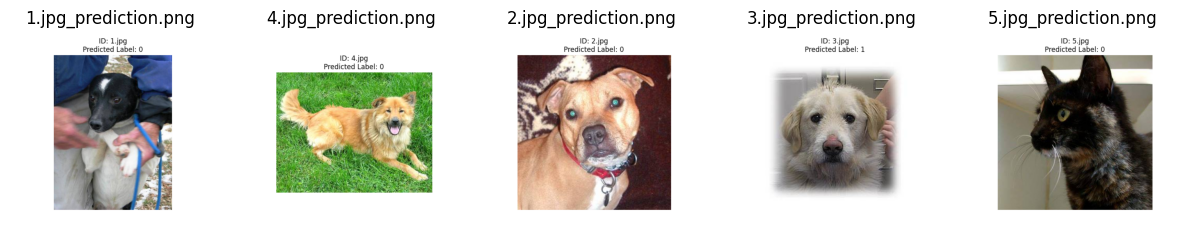

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images_from_dir(directory, num_images=5):
    image_files = os.listdir(directory)[:num_images]

    plt.figure(figsize=(15, 10))
    for i, image_file in enumerate(image_files):
        img_path = os.path.join(directory, image_file)
        img = mpimg.imread(img_path)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')

    plt.show()

# Display images from the visual inspection directory
display_images_from_dir(output_images_dir, num_images=5)


Misclassifications

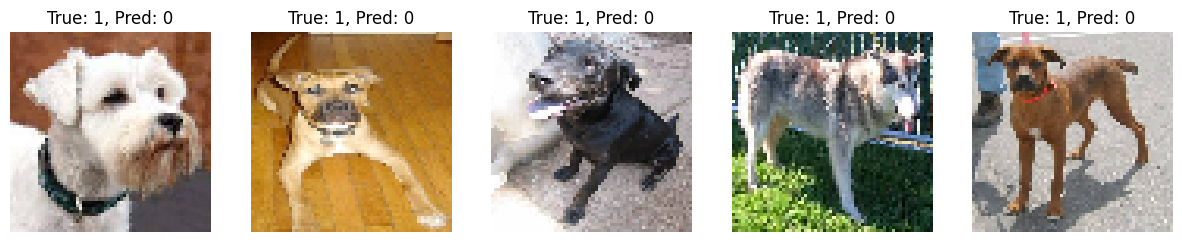

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_misclassifications(X, y_true, y_pred, num_images=5):
    # Calculate original dimensions
    img_height = 64  # Adjust this if your images are of a different size
    img_width = 64   # Adjust this if your images are of a different size
    img_channels = 3

    # Get indices of misclassified examples
    misclassified_indices = np.where(y_true != y_pred)[0]
    misclassified_indices = misclassified_indices[:num_images]

    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(misclassified_indices):
        img = X[idx].reshape(img_height, img_width, img_channels)  # Reshape to original image dimensions

        # Normalize image data
        if img.max() > 1:  # Assuming img is in integer format
            img = img / 255.0

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
        plt.axis('off')
    plt.show()

# Example usage
visualize_misclassifications(X_val, y_val, y_val_pred)


Classification Report:
              precision    recall  f1-score   support

         Cat       0.61      0.65      0.63      2486
         Dog       0.63      0.58      0.60      2514

    accuracy                           0.62      5000
   macro avg       0.62      0.62      0.62      5000
weighted avg       0.62      0.62      0.62      5000



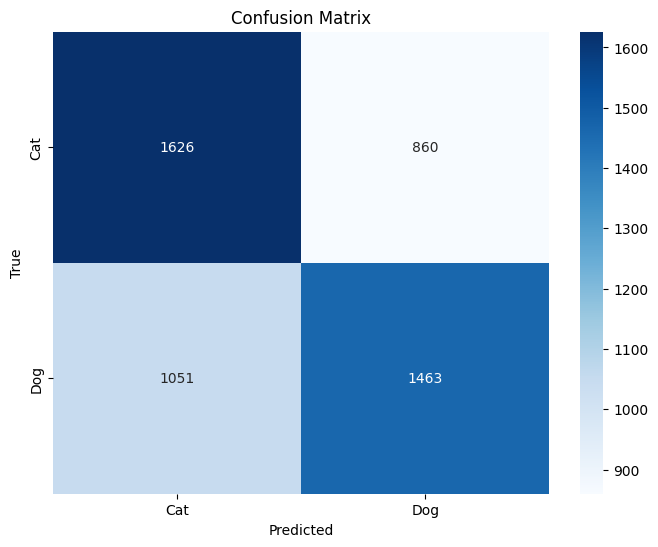

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate model performance on the validation set
y_val_pred = svm_model.predict(X_val_reduced)

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=['Cat', 'Dog']))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
